In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from tensorflow.keras.utils import plot_model

In [2]:
(train_X, train_Y), (test_X, test_Y) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
train_X, test_X = train_X / 255.0, test_X / 255.0

In [4]:
train_Y_one_hot = keras.utils.to_categorical(train_Y, 10)
test_Y_one_hot = keras.utils.to_categorical(test_Y, 10)

In [5]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,672 (2.14 MB)

 Trainable params: 186,890 (730.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 373,782 (1.43 MB)

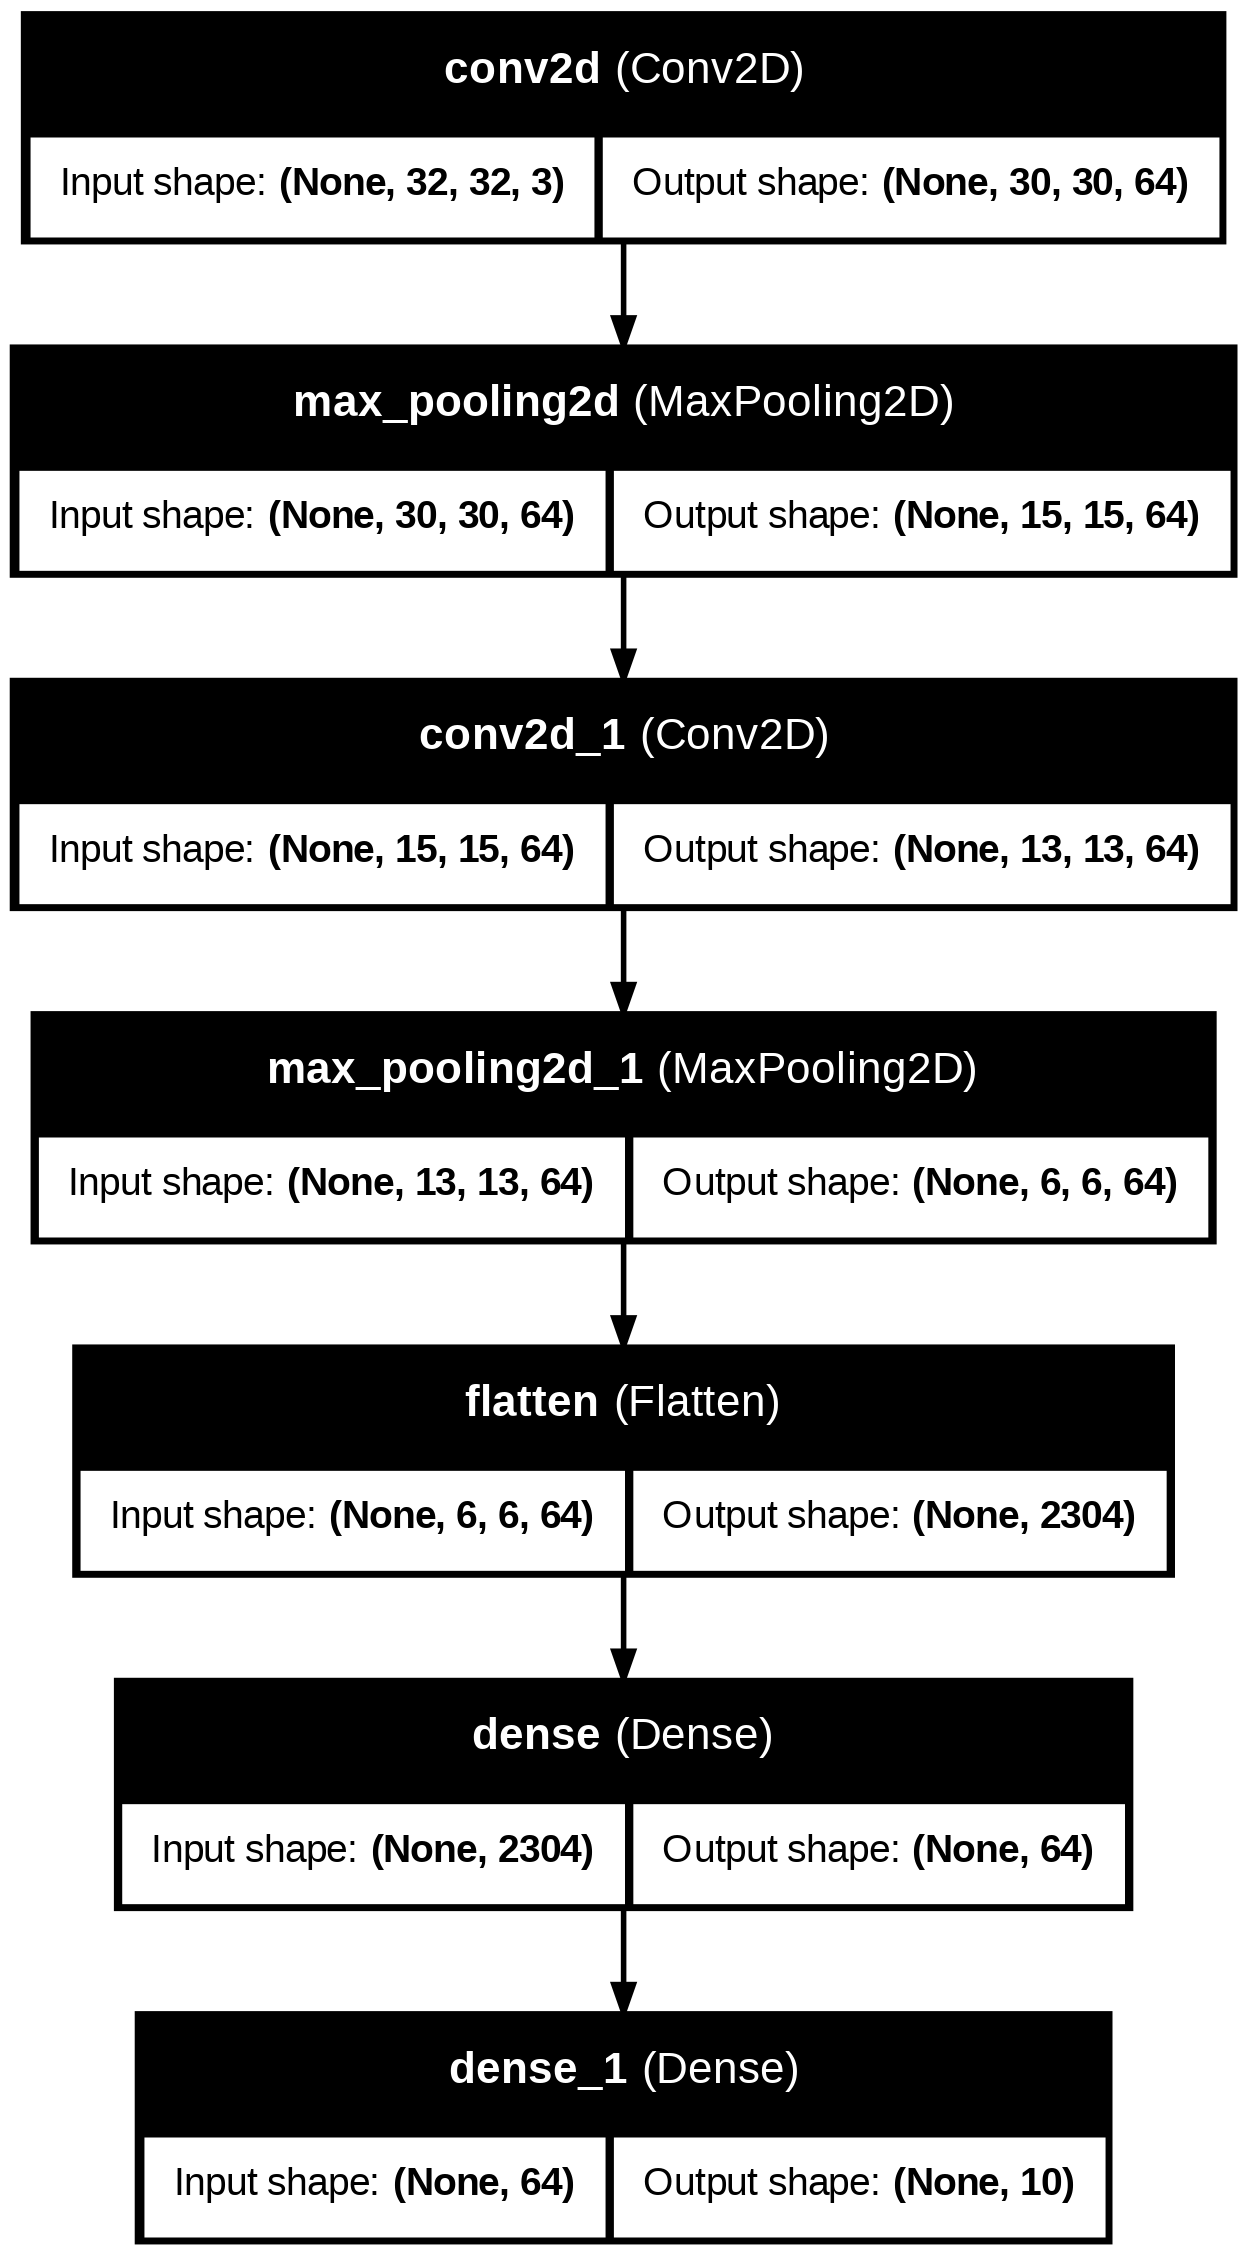

In [20]:
model.summary()
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)

In [7]:
history = model.fit(train_X[:5000], train_Y_one_hot[:5000], batch_size=64, epochs=10,
                    validation_data=(train_X[5000:6000], train_Y_one_hot[5000:6000]))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - accuracy: 0.1813 - loss: 2.1690 - val_accuracy: 0.2930 - val_loss: 1.9181
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.3477 - loss: 1.7896 - val_accuracy: 0.3700 - val_loss: 1.7208
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.4194 - loss: 1.6075 - val_accuracy: 0.4410 - val_loss: 1.5404
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.4768 - loss: 1.4796 - val_accuracy: 0.4790 - val_loss: 1.4602
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.5016 - loss: 1.4225 - val_accuracy: 0.4730 - val_loss: 1.4588
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - accuracy: 0.5444 - loss: 1.2925 - val_accuracy: 0.5080 - val_loss: 1.4021
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.5812 - loss: 1.2126 - val_accuracy: 0.4750 - val_loss: 1.4212
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.5831 - loss: 1.2067 - val_accu

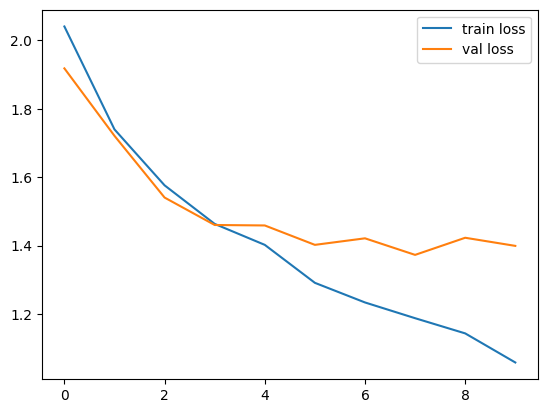

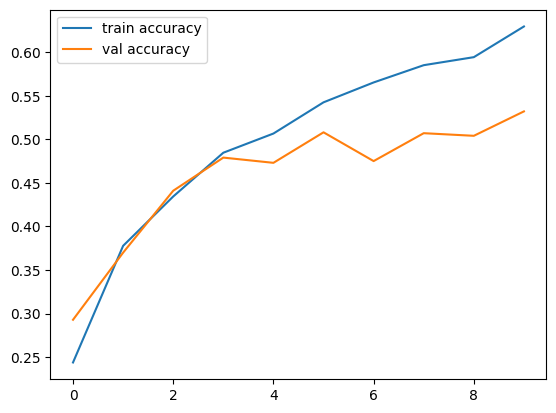

In [8]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [9]:
score = model.evaluate(test_X[:1000], test_Y_one_hot[:1000], verbose=1)
print('Test accuracy:', score[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5288 - loss: 1.3856
Test accuracy: 0.5189999938011169


In [10]:
filters, biases = model.layers[0].get_weights()

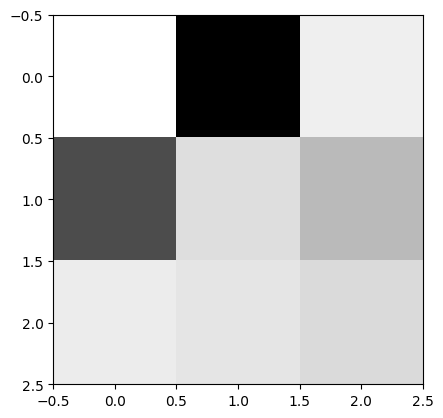

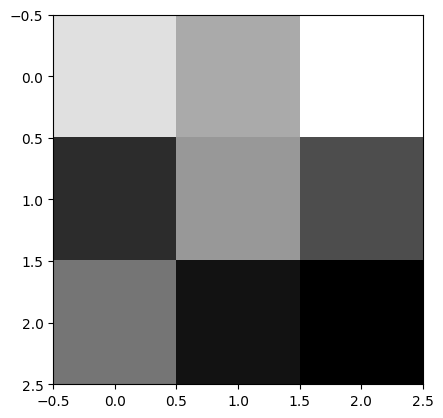

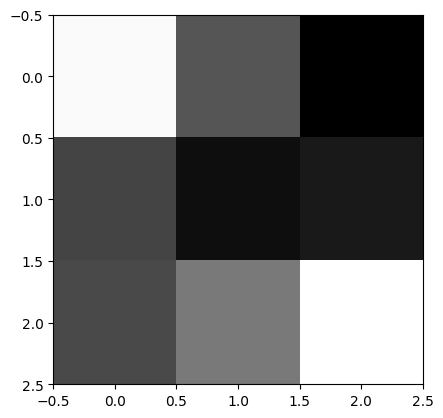

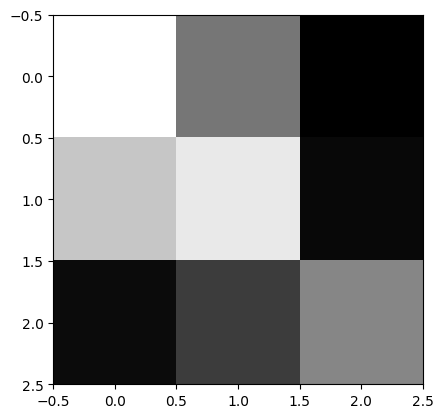

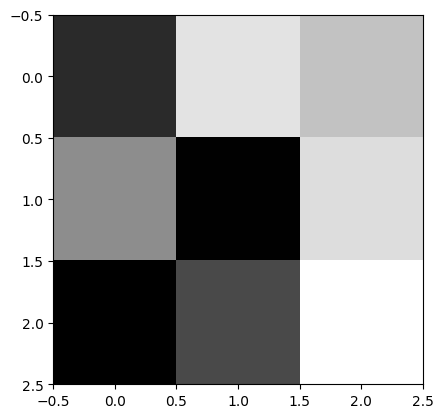

In [11]:
for i in range(5):
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.show()

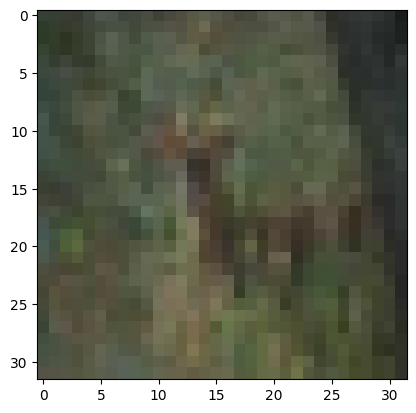

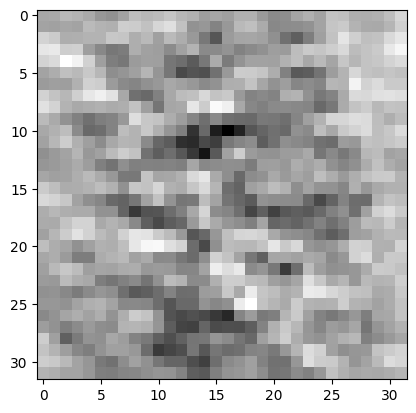

In [12]:
im = train_X[10]
plt.imshow(im)
plt.show()

filt = filters[:, :, :, 1]
filtered_image = signal.convolve2d(im[:, :, 0], filt[:, :, 0], boundary='symm', mode='same')
plt.imshow(filtered_image, cmap='gray')
plt.show()

In [13]:
fc_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
fc_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
fc_history = fc_model.fit(train_X[:5000], train_Y_one_hot[:5000], batch_size=64, epochs=10,
                          validation_data=(train_X[5000:6000], train_Y_one_hot[5000:6000]))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1557 - loss: 2.3126 - val_accuracy: 0.2620 - val_loss: 2.0755
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2887 - loss: 1.9840 - val_accuracy: 0.2620 - val_loss: 1.9896
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3261 - loss: 1.8827 - val_accuracy: 0.3060 - val_loss: 1.9083
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3358 - loss: 1.8698 - val_accuracy: 0.3340 - val_loss: 1.9021
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3570 - loss: 1.7849 - val_accuracy: 0.2950 - val_loss: 1.9509
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3422 - loss: 1.7960 - val_accuracy: 0.3510 - val_loss: 1.8598
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4038 - loss: 1.7050 - val_accuracy: 0.3680 - val_loss: 1.7945
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4046 - loss: 1.7051 - val_accuracy: 0.3590 - val

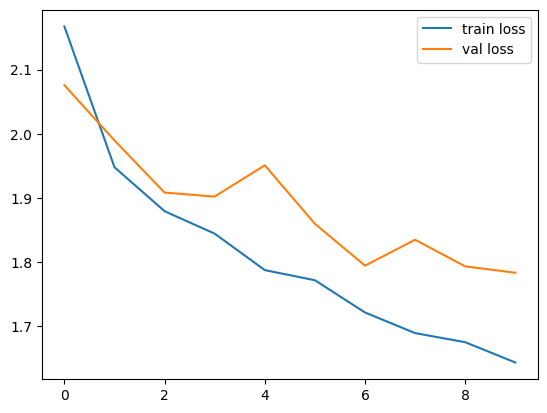

In [16]:
plt.plot(fc_history.history['loss'], label='train loss')
plt.plot(fc_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [17]:
fc_score = fc_model.evaluate(test_X[:1000], test_Y_one_hot[:1000], verbose=1)
print('Fully Connected Model Test Accuracy:', fc_score[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3605 - loss: 1.7806
Fully Connected Model Test Accuracy: 0.367000013589859
